In [8]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/fraud.csv', index_col = 0)
print("Missing values per column:\n", df.isnull().sum())

df = df.dropna(subset=['Class'])

y = df['Class'].values
X = df.drop(columns=['Class']).values

Missing values per column:
 Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.40,
                                    random_state=1)

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit on scaled data
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train_scaled, y_train)

MultinomialNB()

In [12]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train, y_train)

BernoulliNB()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

In [14]:
# a function to evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("="*60)

In [15]:
# Evaluate all models
evaluate_model("GaussianNB", y_test, y_pred_gnb)
evaluate_model("MultinomialNB", y_test, y_pred_mnb)
evaluate_model("BernoulliNB", y_test, y_pred_bnb)

Model: GaussianNB
Accuracy: 0.9769532150265038
Precision: 0.3939393939393939
Recall: 0.8540145985401459
F1 Score: 0.5391705069124424

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8541
           1       0.39      0.85      0.54       137

    accuracy                           0.98      8678
   macro avg       0.70      0.92      0.76      8678
weighted avg       0.99      0.98      0.98      8678

Model: MultinomialNB
Accuracy: 0.01624798340631482
Precision: 0.015794327876412266
Recall: 1.0
F1 Score: 0.031097491771649076

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      8541
           1       0.02      1.00      0.03       137

    accuracy                           0.02      8678
   macro avg       0.51      0.50      0.02      8678
weighted avg       0.98      0.02      0.00      8678

Model: BernoulliNB
Accuracy: 0.995275

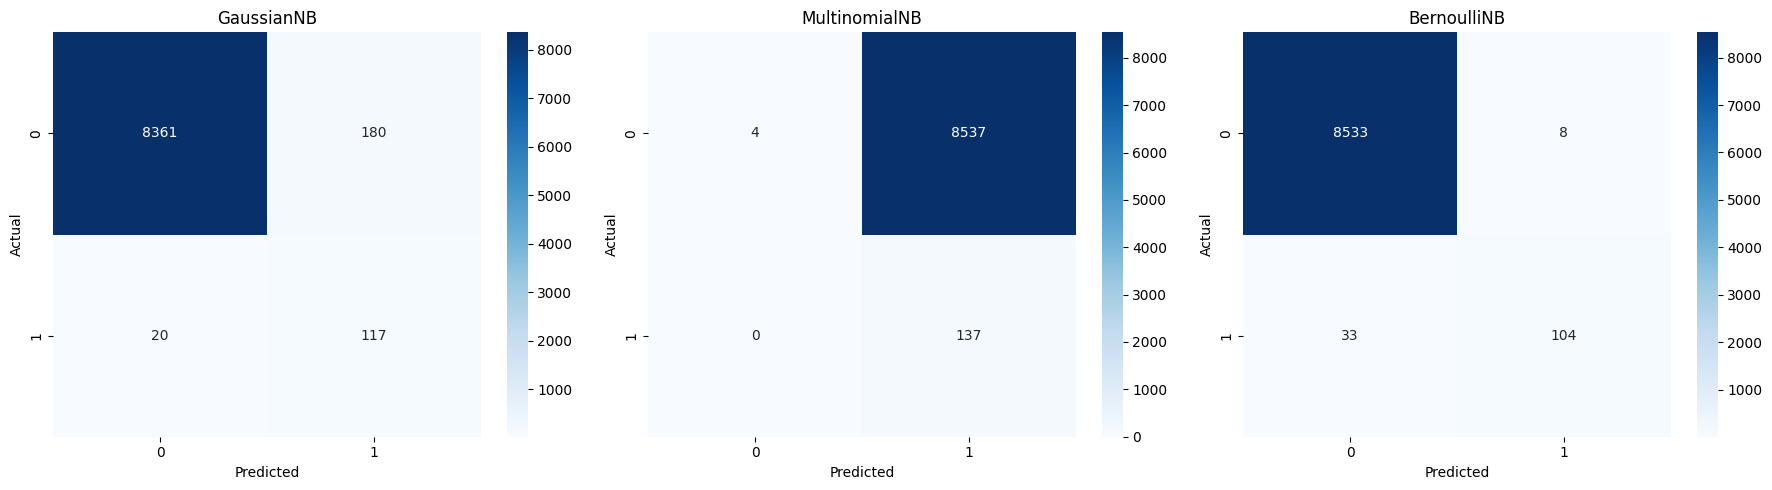

In [16]:
# Confusion Matrices
models = {
    "GaussianNB": y_pred_gnb,
    "MultinomialNB": y_pred_mnb,
    "BernoulliNB": y_pred_bnb
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()